# Python con Pandas - Lifestyle

Per svolgere il seguente progetto ho utilizzato come strumento Anaconda. La prima cosa che ho fatto è stata creare un ambiente virtuale per garantire l'uso di specifiche versioni delle librerie. Ho seguito i passaggi guidati nella scheda "Environments" di Anaconda Navigator per creare l'ambiente virtuale e installare le librerie indispensabili come pandas, matplotlib, seaborn e math.

In [1]:
# Standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Exploratory data analysis

## Data selection

La prima azione da compiere è importare il dataset nell'ambiente di lavoro. Tuttavia, per motivi di sicurezza, eviterò di lavorare direttamente sui dati importati. Invece, creerò una copia di questi che utilizzerò per l'analisi.

In [2]:
apps_row = pd.read_csv('Data_Playstore/googleplaystore.csv')
apps = apps_row.copy()
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data cleaning

Il primo passo da compiere prima di procedere con l'esplorazione e l'analisi dei dati è la pulizia. Infatti, svolgere queste operazioni su un database non pulito potrebbe portare a prendere decisioni inaccurate. Ho suddiviso questa operazione in quattro fasi distinte:

    1) Identificazione e rimozione dei valori mancanti
    2) Correzione dei valori invalidi, come le tipologie dei dati
    3) Identificazione e rimozione dei duplicati
    4) Rimozione delle colonne inutili per l'analisi

In [3]:
apps.shape

(10841, 13)

In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 1) Gestione dei valori mancanti

Effettuo un controllo sul numero dei valori mancanti per ogni colonna del dataset al fine di identificare le eventuali lacune nei dati.

In [5]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

La colonna "Rating" contiene 1474 valori mancanti su un totale di 10841, corrispondente a una percentuale del 13,6%. Dato che questa percentuale è relativamente bassa, ho deciso di eliminare le righe che contengono "NaN".

In [6]:
apps = apps.dropna()
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


### 2) Validazione dei dati

Per condurre un'analisi accurata dei dati, è fondamentale che siano salvati nel formato appropriato. A tal fine, procedo alla conversione delle colonne nel tipo di dato più adatto, e allo stesso tempo, rimuovo simboli come "+" o "$" che ne impedirebbero il risultato.

In [7]:
apps['Reviews'] = apps['Reviews'].astype('float64')
apps['Category'] = apps['Category'].astype('category')
apps['Type'] = apps['Type'].astype('category')
apps['Content Rating'] = apps['Content Rating'].astype('category')
apps['Installs'] = apps['Installs'].str.replace(',', '', regex = False).str.replace('+', '', 
                                                                                    regex = False).astype('float64')
apps['Price'] = apps['Price'].str.replace('$', '', regex = False).astype('float64')
apps = apps.rename(columns = {'Installs' : 'Installs (>)', 'Price': 'Price ($)'})
apps.head()

,App,Category,Rating,Reviews,Size,Installs (>),Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 3) Gestione dei duplicati

Effettuo una verifica sul numero di righe presenti nel dataset per identificare eventuali duplicati.

In [8]:
apps.duplicated().sum()

474

Dato che il numero di righe duplicate, pari a 474, è relativamente basso rispetto al totale, procedo con la loro eliminazione.

In [9]:
apps = apps.drop_duplicates()
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             8886 non-null   object  
 1   Category        8886 non-null   category
 2   Rating          8886 non-null   float64 
 3   Reviews         8886 non-null   float64 
 4   Size            8886 non-null   object  
 5   Installs (>)    8886 non-null   float64 
 6   Type            8886 non-null   category
 7   Price ($)       8886 non-null   float64 
 8   Content Rating  8886 non-null   category
 9   Genres          8886 non-null   object  
 10  Last Updated    8886 non-null   object  
 11  Current Ver     8886 non-null   object  
 12  Android Ver     8886 non-null   object  
dtypes: category(3), float64(4), object(6)
memory usage: 791.3+ KB


### 4) Ottimizzazione del dataset

L'ultima fase della pulizia prevede l'eliminazione delle colonne non rilevanti per l'analisi. Considerando che le colonne "Genres" e "Category" contengono le stesse informazioni, procedo con l'eliminazione della colonna "Genres". Inoltre, le colonne relative alla versione di Android, alla versione attuale dell'app e alla data dell'ultimo aggiornamento sono superflue, pertanto provvedo ad eliminarle dal dataset.

In [10]:
apps.drop(['Size', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1, inplace = True)
apps.head()

,App,Category,Rating,Reviews,Installs (>),Type,Price ($),Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone


## Data exploration

Ora posso concentrarmi sulla descrizione del dataset, sull'analisi delle correlazioni tra le variabili e sull'individuazione degli outliers, al fine di ottenere una comprensione approfondita dei dati.

In [11]:
apps.describe()

,Rating,Reviews,Installs (>),Price ($)
count,8886.000000,8.886000e+03,8.886000e+03,8886.000000
mean,4.187959,4.730928e+05,1.650061e+07,0.963526
std,0.522428,2.906007e+06,8.640413e+07,16.194792
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,1.000000e+04,0.000000
50%,4.300000,4.723000e+03,5.000000e+05,0.000000
75%,4.500000,7.131325e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


Per prima cosa ci focalizziamo sul pairplot. Questo grafico ci fornisce una relazione diretta tra ogni coppia di variabili numeriche presenti nel dataframe. In questo caso abbiamo:

    1) Rating, 
    2) Reviews, 
    3) Installs (>), 
    4) Price ($).

### Pairplot

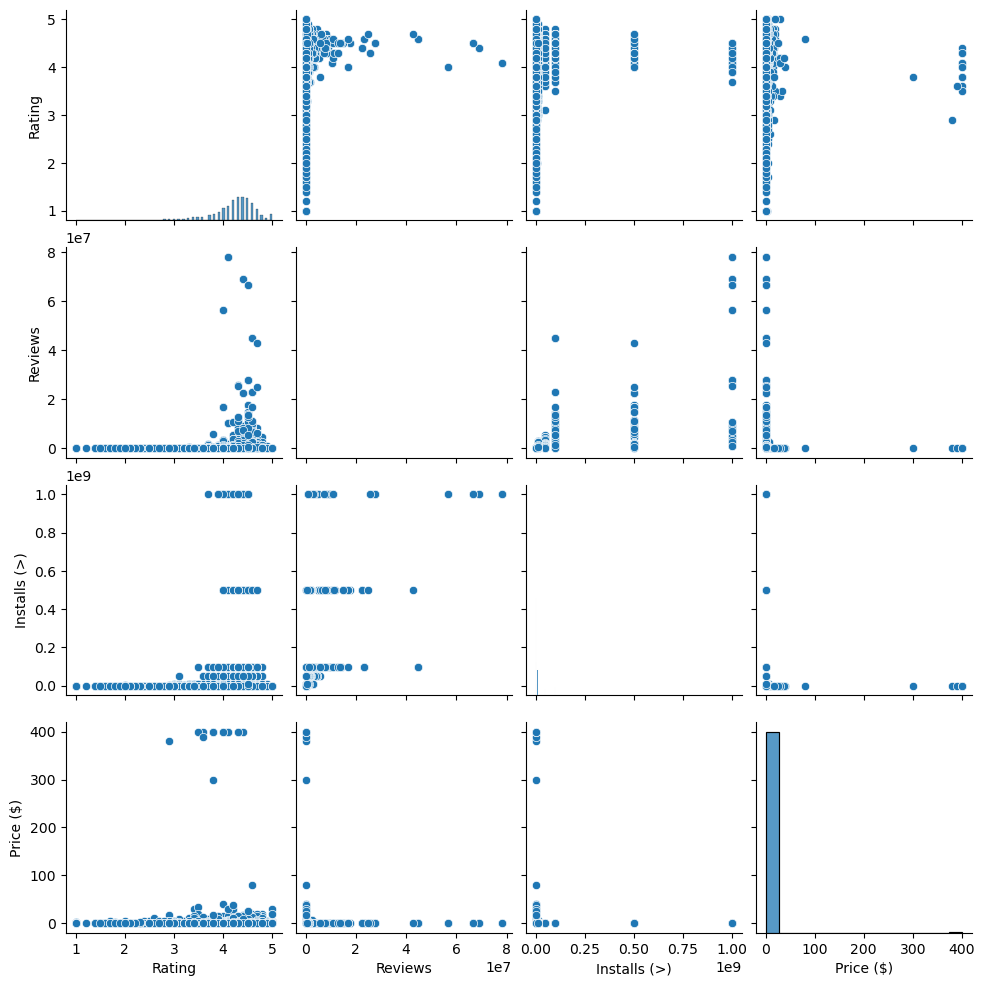

In [12]:
sns.pairplot(apps)

L'idea dietro al pairplot è quella di comprendere le relazioni tra le variabili presenti nel dataset. Un altro modo per trovare queste relazioni è usare la Matrice di correlazione e creare una Heat Map per visualizzare le correlazioni tra le variabili.

### Correlation Matrix

In [13]:
correlation_matrix = apps[['Rating', 'Reviews', 'Installs (>)', 'Price ($)']].corr()
correlation_matrix

,Rating,Reviews,Installs (>),Price ($)
Rating,1.000000,0.068724,0.050869,-0.022371
Reviews,0.068724,1.000000,0.633422,-0.009562
Installs (>),0.050869,0.633422,1.000000,-0.011334
Price ($),-0.022371,-0.009562,-0.011334,1.000000


### Heat Map

<Axes: >

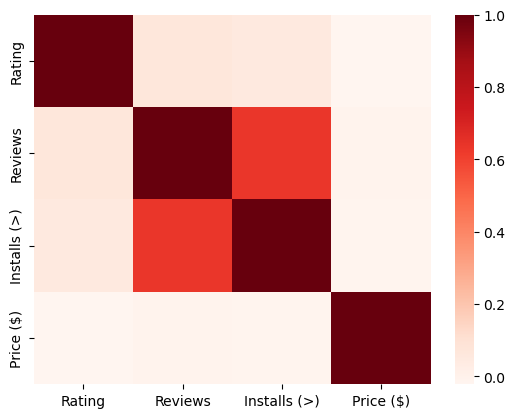

In [14]:
sns.heatmap(correlation_matrix, cmap = 'Reds')

Dalla Heat Map vediamo che esiste una correlazione positiva (0.63) tra "Reviews" e "Installs", ovvero esiste una diretta proporzionalità tra il numero di installazioni e il numero di recensioni.
Ciò implica che i clienti tendono a scaricare maggiormente un'applicazione se è stata recensita da un numero maggiore di persone, ma anche che molti utenti attivi che scaricano un'app solitamente lasciano una recensione o un feedback.
Quindi, far recensire un'app da un maggior numero di persone potrebbe essere una buona idea per catturare l'attenzione degli utenti.
Questa diretta proporzionalità risulta evidente dal seguente grafico.

### Scatter plot con linea di tendenza

Per agevolare la visualizzazione e la comprensione dei dati, ho adottato una scala logaritmica sia sull'asse delle ascisse che su quella delle ordinate.

<Axes: xlabel='Reviews', ylabel='Installs (>)'>

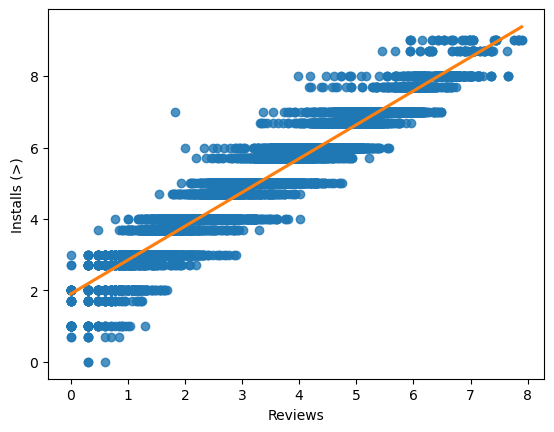

In [15]:
sns.regplot(data=apps, x=apps["Reviews"].apply(lambda x: math.log10(x)), 
            y = apps["Installs (>)"].apply(lambda x: math.log10(x)),  scatter=True, line_kws={"color": "C1"})

### Average Rating

Ci sono applicazioni con giudizi molto positivi o molto negativi? 

Text(0.5, 1.0, 'Rating VS Count')

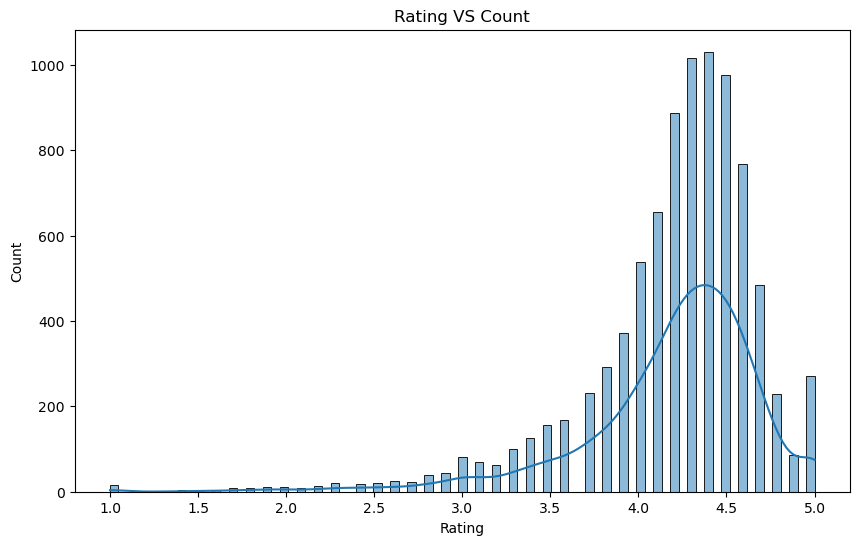

In [16]:
fig = plt.figure(figsize=(10, 6))
#sns.set_theme(style='darkgrid')
sns.histplot(data = apps, x = 'Rating', kde = True)
plt.title('Rating VS Count')

In generale, la maggior parte delle app si comporta bene, con una valutazione media di 4,19.

### Prezzo app: gratuite vs pagamento

Un'altra caratteristica da considerare nella creazione di un'app è decidere se renderla gratuita o a pagamento. Per fare ciò, confronto il numero di app gratuite e a pagamento presenti sul Play Store per comprendere meglio il mercato.

Text(0, 0.5, 'Number of apps')

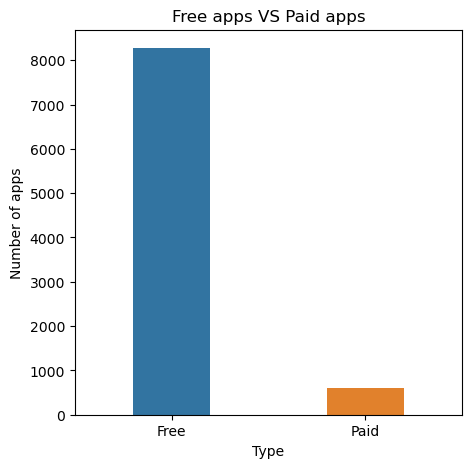

In [17]:
fig = plt.figure(figsize = (5, 5))
plt.title('Free apps VS Paid apps')
ax = sns.countplot(x = 'Type', data = apps, width = 0.4)
ax.set_ylabel('Number of apps')

Dal grafico si evince che le app gratuite sono molto più diffuse sul mercato rispetto a quelle a pagamento.

### Costo delle app nelle diverse categorie

Controllo i prezzi delle app in base alla loro categoria di appartenenza.

Text(0.5, 1.0, 'App price across categories')

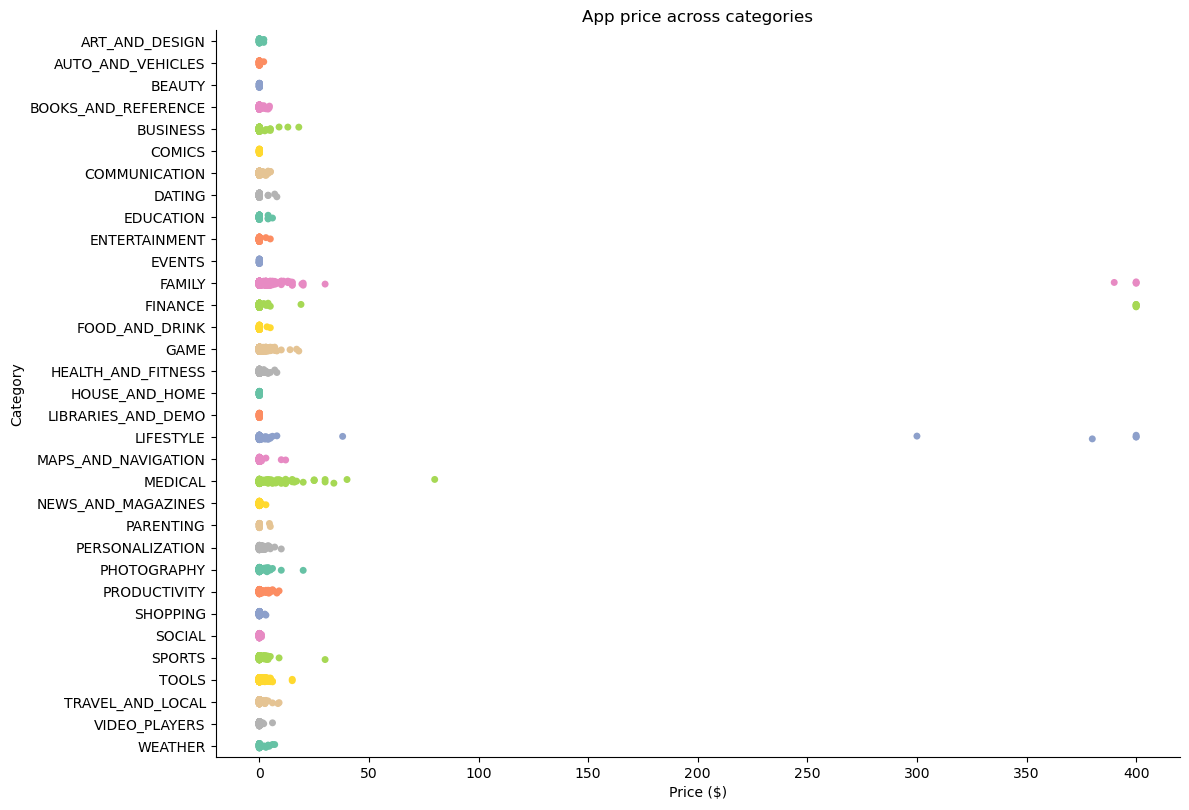

In [18]:
sns.catplot(data=apps, x="Price ($)", y="Category", height=8, aspect=1.5, hue="Category", palette="Set2", legend=False)
# Utilizzo i parametri height e aspect di catplot() per ingrandire il grafico. 
# Imposto il parametro height su un valore maggiore per aumentare l'altezza del grafico, mentre il parametro aspect 
# su un valore minore per rendere il grafico più largo
plt.title('App price across categories')

Dal grafico possiamo dedurre che:

    1) la maggior parte delle app ha un prezzo inferiore a 50$
2) esistono alcune app che costano oltre 100$

### Outliers

Vado a controllare le applicazioni che costano più di 80$ per verificarne l'affidabilità o per accertarmi che siano delle truffe.

In [19]:
apps.loc[apps["Price ($)"] > 80]

,App,Category,Rating,Reviews,Installs (>),Type,Price ($),Content Rating
4197,most expensive app (H),FAMILY,4.3,6.0,100.0,Paid,399.99,Everyone
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,10000.0,Paid,399.99,Everyone
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,10000.0,Paid,400.00,Everyone
5351,I am rich,LIFESTYLE,3.8,3547.0,100000.0,Paid,399.99,Everyone
5354,I am Rich Plus,FAMILY,4.0,856.0,10000.0,Paid,399.99,Everyone
5355,I am rich VIP,LIFESTYLE,3.8,411.0,10000.0,Paid,299.99,Everyone
5356,I Am Rich Premium,FINANCE,4.1,1867.0,50000.0,Paid,399.99,Everyone
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,1000.0,Paid,379.99,Everyone
5358,I am Rich!,FINANCE,3.8,93.0,1000.0,Paid,399.99,Everyone
5359,I am rich(premium),FINANCE,3.5,472.0,5000.0,Paid,399.99,Everyone


Come si può facilmente intuire dai loro nomi, queste app sono truffaldine e non sono utili ai fini dell'analisi. Pertanto, provvederò ad eliminarle dal dataframe.

In [20]:
apps.drop(apps.loc[apps["Price ($)"] > 80].index, inplace=True)

Vado a ricontrollare i prezzi delle app nelle diverse categorie per verificare che gli outliers siano stati effettivamente eliminati.

Text(0.5, 1.0, 'App price across categories (after filtering junk apps)')

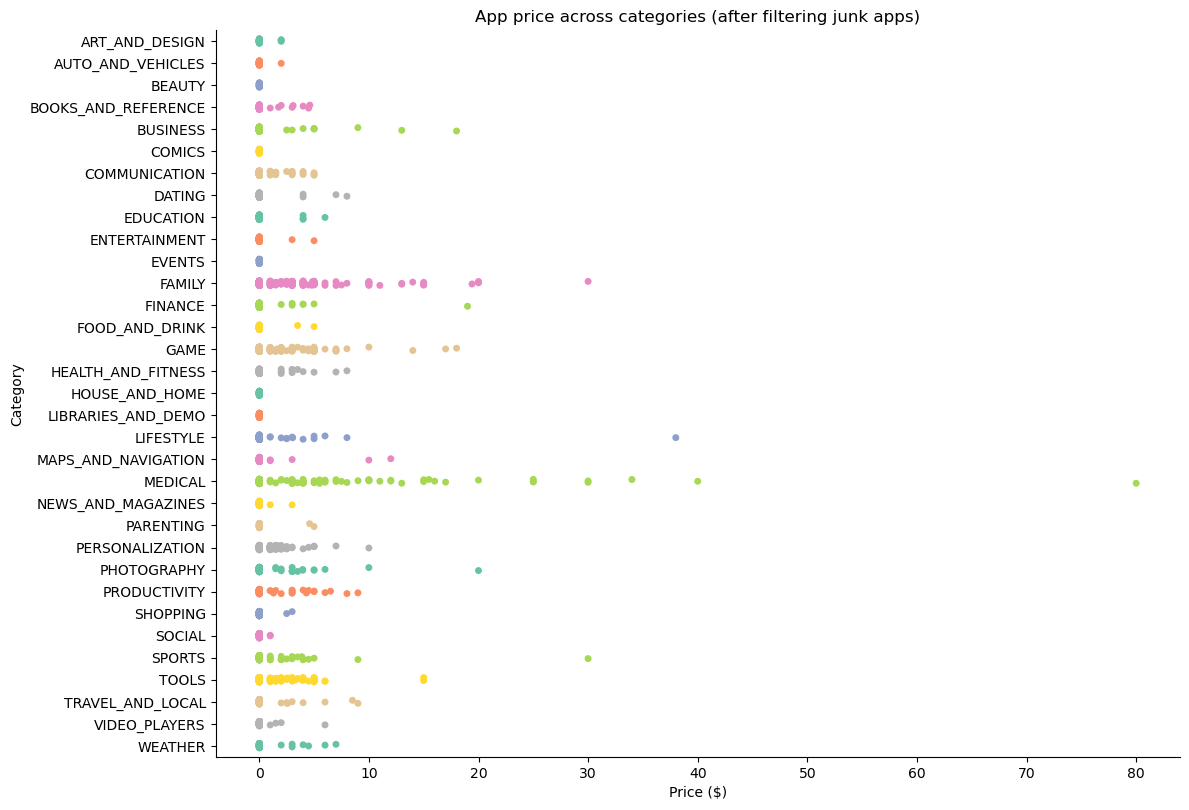

In [21]:
sns.catplot(data=apps, x="Price ($)", y="Category", height=8, aspect=1.5, hue="Category", palette="Set2", legend=False)
plt.title('App price across categories (after filtering junk apps)')

Analizzando il grafico possiamo concludere che:

    1) La categoria con l'app più costosa è "Medical" 
    2) La maggior parte delle app ha un prezzo inferiore a 30$
3) Tutti i giochi hanno un prezzo inferiore a 20$

### Concorrenza tra le categorie

Per identificare il settore giusto per la creazione della mia prima app, ho bisogno di conoscere il numero di app presenti in ogni categoria, in modo da individuare quelle in cui c'è maggiore e minore concorrenza.

Text(0.5, 0, 'Number of apps')

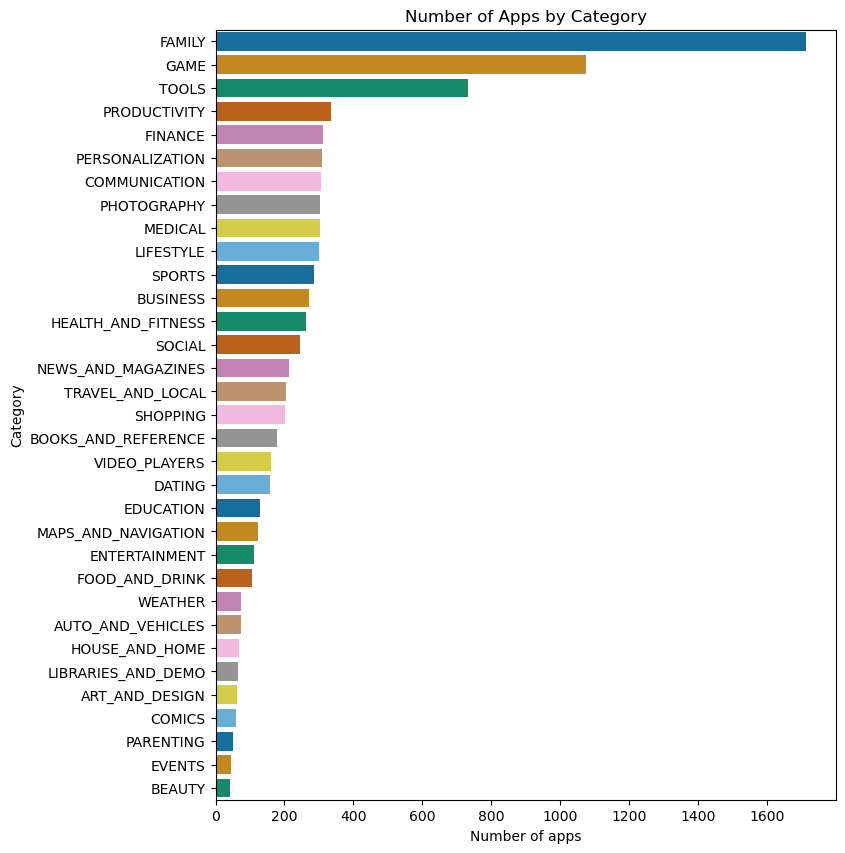

In [22]:
# Numerro di app per categoria
fig = plt.figure(figsize = (8, 10))
plt.title('Number of Apps by Category')
ax = sns.countplot(y = 'Category', data = apps, 
                   order = apps['Category'].value_counts().index,
                  palette = 'colorblind')
ax.set_xlabel('Number of apps')

Dal grafico precedente si nota che le categorie con maggior concorrenza, ovvero quelle in cui il maggior numero di app competono nello stesso mercato, sono: 

    1) Family, 
    2) Game,
    3) Tools.
    
Il fatto che la categoria "Family" risulti come quella con più app, potrebbe voler dire che la maggior parte delle app sono rivolte ad un pubblico eterogeneo e non limitato quindi all'età. Cercherò di verificarlo successivamente controllando il numero di app per categoria dei contenuti.
Questo ovviamente rivela i generi di app più frequenti e non necessariamente quelli con il maggior numero di utenti.

### App per classificazione dei contenuti

Per comprendere meglio i dati disponibili, potrebbe essere utile confrontare il numero di app suddivise in base alla classificazione dei contenuti. 
Questa strategia consente di individuare le tendenze del mercato e di rilevare eventuali nicchie ancora inesplorate, aiutando a definire la posizione della propria app e a valutare la competitività della categoria in cui si intende operare.

<Axes: title={'center': 'Number of apps by Content Rating'}, xlabel='count', ylabel='Content Rating'>

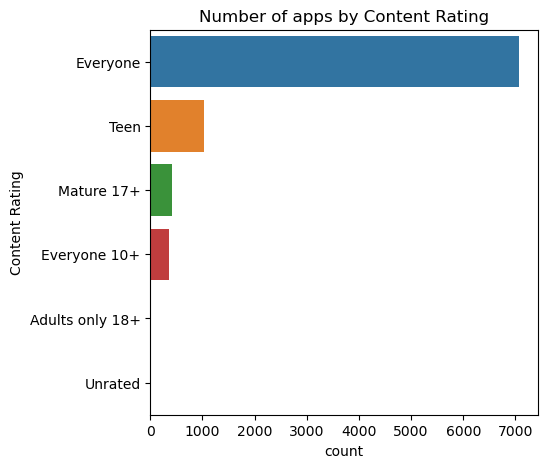

In [23]:
fig = plt.figure(figsize = (5, 5))
plt.title('Number of apps by Content Rating')
sns.countplot(y = 'Content Rating', data = apps, order = apps['Content Rating'].value_counts().index)

Dal grafico precedente si evince che la maggior parte delle app presenti sul mercato sono rivolte a tutta la popolazione senza particolari restrizioni sull'età. Ciò conferma la mia precedente ipotesi.

### Categorie più popolari

Possiamo identificare le categorie con maggior interesse da parte degli utenti osservando quelle che hanno ricevuto valutazioni elevate, un alto numero di recensioni e un elevato numero di installazioni. Per farlo, calcoliamo:

    1) la valutazione media per ogni categoria, 
    2) il totale delle recensioni e delle installazioni.

#### 1) Average rating

Calcolo la valutazione media per ogni categoria al fine di capire in quale settore gli utenti sono più o meno soddisfatti delle applicazioni presenti. 

In [24]:
avg_rating_by_category = apps.groupby('Category')['Rating'].mean().sort_values(ascending = False)
avg_rating_by_category.name = 'Average Rating'
#avg_rating_by_category.name

#### 2) Total installations and reviews

Calcolo il numero totale di installazioni e di recensioni per ogni categoria di applicazioni al fine di identificare quali categorie suscitano maggiore interesse tra gli utenti. Questa informazione può essere utile per sviluppare applicazioni di maggior successo e popolarità sul mercato.

In [25]:
tot_inst_rev_by_cat = apps.groupby('Category')[['Installs (>)', 'Reviews']].sum().sort_values(
    by = ['Installs (>)', 'Reviews'], ascending = False)
tot_inst_rev_by_cat.columns = ['Total Installs (>)', 'Total Reviews']
#tot_inst_rev_by_cat

Ora combino i risultati ottenuti in precedenza per creare una tabella riassuntiva che consenta di identificare i settori più promettenti per lo sviluppo di una nuova app.

In [26]:
popular_categories = tot_inst_rev_by_cat.join(avg_rating_by_category)
popular_categories

,Total Installs (>),Total Reviews,Average Rating
Category,,,
GAME,3.154386e+10,1.415534e+09,4.281285
COMMUNICATION,2.415224e+10,6.012731e+08,4.151466
SOCIAL,1.251384e+10,5.335765e+08,4.254918
PRODUCTIVITY,1.246307e+10,1.025542e+08,4.201796
TOOLS,1.145022e+10,2.731802e+08,4.047203
FAMILY,1.004106e+10,3.967673e+08,4.191535
PHOTOGRAPHY,9.721243e+09,2.042974e+08,4.182895
TRAVEL_AND_LOCAL,6.361859e+09,5.556501e+07,4.094146
VIDEO_PLAYERS,6.221897e+09,1.103797e+08,4.063750


Per agevolare la comprensione dei dati, ho deciso di creare un grafico a barre per visualizzare il contenuto della tabella. Questa rappresentazione visiva consente di ottenere una panoramica chiara e immediata delle informazioni presenti nel dataset.

Text(0.5, 0, 'Number of installations')

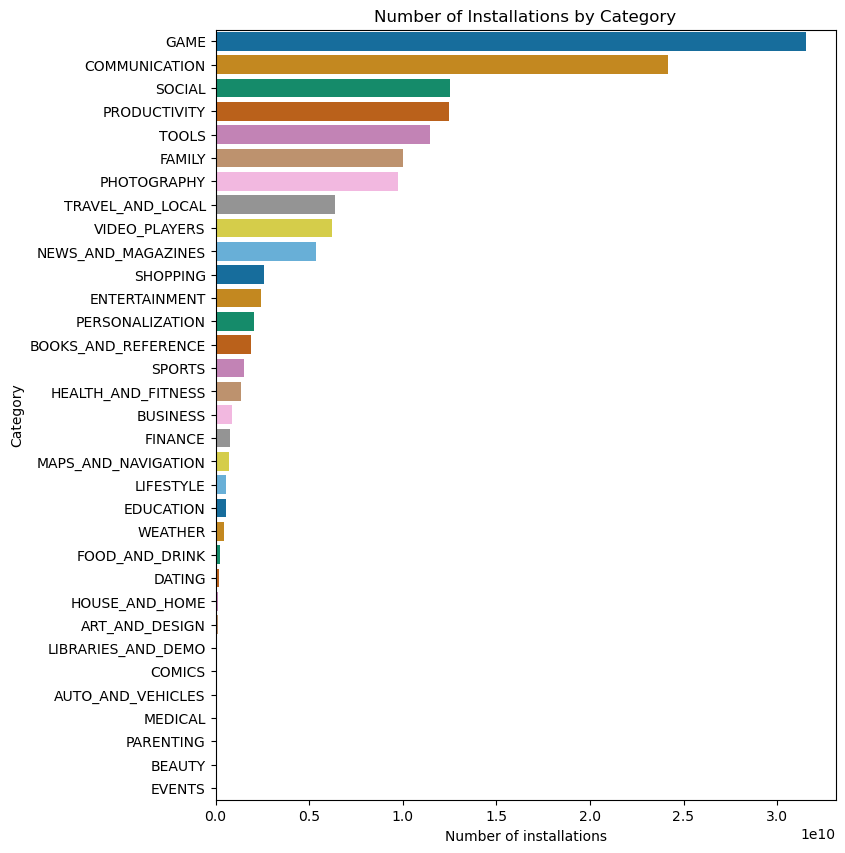

In [27]:
fig = plt.figure(figsize = (8, 10))
plt.title('Number of Installations by Category')
ax = sns.barplot(data = popular_categories, y = popular_categories.index, x = 'Total Installs (>)', 
                 order = popular_categories['Total Installs (>)'].index,
                palette = 'colorblind')
ax.set_xlabel('Number of installations')

Dal grafico si deduce che le categorie "game", "communication" e "social" sono le più popolari tra gli utenti. Tuttavia, è importante considerare che le valutazioni delle app appartenenti alla categoria dei social network potrebbero essere influenzate da alcune applicazioni molto popolari come Facebook e Instagram, e lo stesso potrebbe valere anche per la categoria "communication" con app come Whatsapp o Telegram. Al fine di verificare questa ipotesi, procederò con l'analisi delle valutazioni delle singole app all'interno di queste categorie.

#### Communication

In [28]:
communication_app = apps.groupby('Category').apply(lambda apps: apps.loc[apps['Category'] == 'COMMUNICATION', 
                                                                         ['App', 'Installs (>)']])
communication_app = communication_app.reset_index(drop = True)
communication_app

,App,Installs (>)
0,Messenger – Text and Video Chat for Free,1.000000e+09
1,WhatsApp Messenger,1.000000e+09
2,Messenger for SMS,1.000000e+07
3,Google Chrome: Fast & Secure,1.000000e+09
4,Messenger Lite: Free Calls & Messages,1.000000e+08
...,...,...
302,Sat-Fi Voice,1.000000e+03
303,Free Wi-fi HotspoT,5.000000e+04
304,Firefox Focus: The privacy browser,1.000000e+06
305,FreedomPop Messaging Phone/SIM,5.000000e+05


Text(0.5, 1.0, 'Distribuzione Installazioni App Communication')

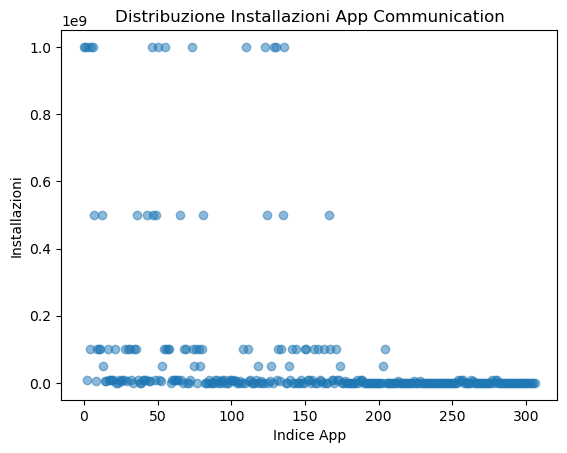

In [29]:
plt.scatter(communication_app.index, communication_app['Installs (>)'], alpha=0.5) # crea il grafico a dispersione
plt.xlabel('Indice App')
plt.ylabel('Installazioni')
plt.title('Distribuzione Installazioni App Communication')

Dalla tabella e dal grafico si nota che le app più installate dagli utenti sono sviluppate da aziende consolidate e molto forti nel mercato da anni. Competere con queste realtà potrebbe risultare difficoltoso e poco conveniente.

#### Social

In [30]:
social_app = apps.groupby('Category').apply(lambda apps: apps.loc[apps['Category'] == 'SOCIAL', ['App', 'Installs (>)']])
social_app = social_app.reset_index(drop = True)
social_app

,App,Installs (>)
0,Facebook,1.000000e+09
1,Instagram,1.000000e+09
2,Facebook Lite,5.000000e+08
3,"Messages, Text and Video Chat for Messenger",1.000000e+07
4,Tumblr,1.000000e+08
...,...,...
239,Alarm.fo – choose your info,1.000000e+03
240,FunForMobile Ringtones & Chat,5.000000e+06
241,Chat For Strangers - Video Chat,1.000000e+05
242,Fr Daoud Lamei,1.000000e+05


Text(0.5, 1.0, 'Distribuzione Installazioni App Social')

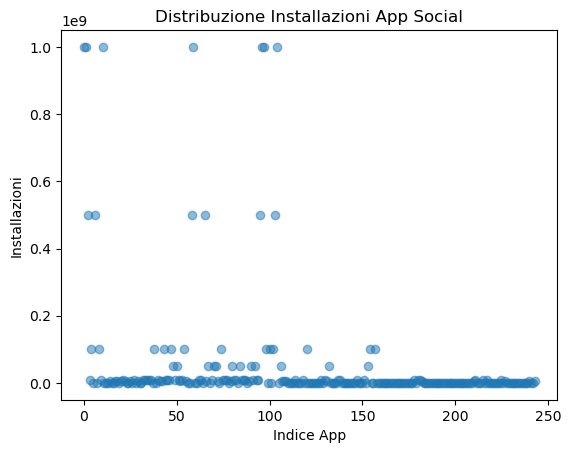

In [31]:
plt.scatter(social_app.index, social_app['Installs (>)'], alpha=0.5) # crea il grafico a dispersione
plt.xlabel('Indice App')
plt.ylabel('Installazioni')
plt.title('Distribuzione Installazioni App Social')

Analogamente a quanto detto per le app della categoria "communication", anche Facebook, Instagram e altre app di social media vantano un enorme numero di valutazioni da parte degli utenti rispetto al resto dell'elenco. Pertanto, sviluppare un'applicazione gratuita per i social media potrebbe non essere sensato, dal momento che il mercato è dominato da poche applicazioni che hanno già una vasta base di utenti. Considerando le risorse di Facebook e delle sue aziende collegate, sarebbe difficile competere direttamente con loro.

#### Game

In [32]:
game_app = apps.groupby('Category').apply(lambda apps: apps.loc[apps['Category'] == 'GAME', ['App', 'Installs (>)']])
game_app = game_app.reset_index(drop = True)
game_app

,App,Installs (>)
0,ROBLOX,1.000000e+08
1,Subway Surfers,1.000000e+09
2,Candy Crush Saga,5.000000e+08
3,Solitaire,1.000000e+07
4,Bubble Shooter,1.000000e+07
...,...,...
1069,Winter Wonderland,5.000000e+04
1070,Soccer Clubs Logo Quiz,1.000000e+06
1071,Sid Story,5.000000e+05
1072,Fatal Raid - No.1 Mobile FPS,1.000000e+06


Text(0.5, 1.0, 'Distribuzione Installazioni App Game')

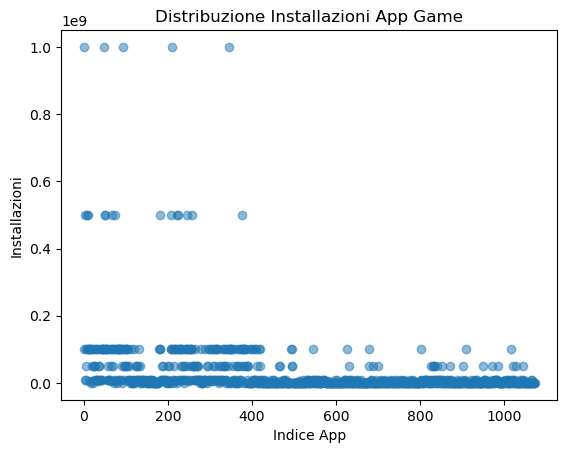

In [33]:
plt.scatter(game_app.index, game_app['Installs (>)'], alpha=0.5) # crea il grafico a dispersione
plt.xlabel('Indice App')
plt.ylabel('Installazioni')
plt.title('Distribuzione Installazioni App Game')

Invece, sebbene nella categoria "game" siano presenti numerose applicazioni, quelle che si distinguono per il numero di installazioni sono veramente poche. Ciò potrebbe rendere il mercato più accessibile a nuovi sviluppatori e offrire un'opzione interessante per lo sviluppo di un'app nella suddetta categoria.

# Strategia

Ricapitolando, la maggior parte delle app disponibili sul Play Store sono gratuite e la categoria "game" sembra essere la più interessante per lo sviluppo di una nuova app. Di conseguenza, sarebbe opportuno sviluppare un'app gratuita con entrate principalmente basate su:

    1) pubblicità non invasiva,
    2) possibilità di rimuovere gli annunci pubblicitari mediante pagamento o donazione
    3) acquisti in-app di specifici oggetti

In altre parole, il successo dell'app dipenderà dall'interazione degli utenti con gli annunci, che a loro volta genereranno entrate per l'app stessa. Inoltre, incentivare le persone a lasciare recensioni positive sul Play Store potrebbe essere una buona strategia per attirare più utenti, poiché gli utenti, al momento del download, tendono a preferire applicazioni con recensioni positive.